# ベイズ勉強会 Part 3 1次元ガウス分布のベイズ推論
> 1次元ガウス分布のベイズ推論を実践する

- toc: true 
- badges: true
- comments: true
- categories: [bayes]
- image: images/dag1.png

ベイズ勉強会資料は『ベイズ推論による機械学習入門』{% fn 1 %}を元に、途中式計算をできるだけ省略せずに行ったものです。

# 1次元ガウス分布

1次元のガウス分布(以下本ページでは単に「ガウス分布」と呼ぶ)は、次の確率密度関数で表される$x \in \mathbb{R}$を生成する確率分布である。

> Important: 1次元ガウス分布の確率密度関数$$\mathcal{N}(x|\mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp\{-\frac{(x-\mu)^2}{2\sigma^2}\}$$

パラメータは$\mu \in \mathbb{R}, \sigma^2 \in \mathbb{R^+}$の2つで、それぞれ平均と分散である。精度パラメータ$\lambda = \sigma^{-2}$を用いて書くこともある。精度で書くと以下のようになる。

> Important: 精度で表した1次元ガウス分布の確率密度関数$$\mathcal{N}(x|\mu,\lambda^{-1}) = \frac{1}{\sqrt{2 \pi}} \lambda^{\frac{1}{2}}exp\{-\frac{1}{2}(x-\mu)^2 \lambda\}$$

以下、観測されたデータ$\mathcal{D}=\{x_1,\dots,x_N\}$の各点$x_n$と未知の観測$x_*$は同じ1次元ガウス分布から独立に生成されたと仮定してベイズ推論を行う。

# 平均が未知、精度が既知の場合

ガウス分布の2つのパラメータのうち、精度パラメータ$\lambda$が既知である状況でベイズ推論を行う。

## モデルの構築

平均$\mu$だけが未知という条件で、尤度関数をガウス分布にした場合、そのパラメータ$\mu$の事前分布はどうすればよいだろうか。$\mu$の条件は$\mu \in \mathbb{R}$であることのみであり、実数を1つ出力する分布を事前分布とすればベイズ推論ができそうだ。このような分布は様々だが、1次元ガウス分布を用いることで事後分布も1次元ガウス分布となることが知られている。つまり尤度関数が1次元ガウス分布の場合の共役事前分布は1次元ガウス分布である。これを用いて同時分布を構築すると以下のようになる。

$$
\begin{eqnarray}
    p(\mathcal{D},x_*,\mu) &=& p(\mathcal{D}|\mu)p(x_*|\mu)p(\mu) \\
    p(\mathcal{D}|\mu) &=& \Pi_{n=1}^{N} \mathcal{N}(x_n|\mu, \lambda^{-1}) \\
    p(x_*|\mu) &=& \mathcal{N}(x_*|\mu, \lambda^{-1}) \\
    p(\mu) &=& \mathcal{N}(\mu|m, \lambda_{\mu}^{-1})
\end{eqnarray}
$$

$p(\mu)$の$m \in \mathbb{R}, \lambda_{\mu} \in \mathbb{R^+}$は固定されたハイパーパラメータである。

## 事後分布の推論

事後分布$p(\mu|\mathcal{D})$を求める。ベイズの定理から次のように書ける。分母は形状には関わらないので省く。

$$
\begin{eqnarray}
    p(\mu|\mathcal{D}) &\propto& p(\mathcal{D}|\mu) p(\mu) \\
    &=& \{\Pi_{n=1}^{N} p(x_n|\mu)\}p(\mu) \\
    &=& \{\Pi_{n=1}^{N} \mathcal{N}(x_n|\mu, \lambda^{-1})\} \mathcal{N}(\mu|m,\lambda_{\mu}^{-1})
\end{eqnarray}
$$

対数をとると、

$$
\begin{eqnarray}
    \ln p(\mu|\mathcal{D}) &=& \Sigma_{n=1}^{N} \ln \mathcal{N}(x_n|\mu,\lambda^{-1}) + \ln \mathcal{N}(\mu|m,\lambda_{\mu}^{-1}) + const. \\
    &=& \Sigma_{n=1}^{N} \{-\frac{1}{2}(x_n-\mu)^2 \lambda\} + \{-\frac{1}{2}(\mu-m)^2 \lambda_{\mu}\} + const. \\
    &=& -\frac{1}{2}\left[\Sigma_{n=1}^{N}\{(x_n^2 -2x_n\mu + \mu^2)\lambda\} + (\mu^2 - 2\mu m + m^2)\lambda_{\mu}\right] + const. \\
    &=& -\frac{1}{2}\{(N\lambda + \lambda_{\mu})\mu^2 - 2(\Sigma_{n=1}^{N} x_n \lambda + m \lambda_{\mu})\mu\} + const.
\end{eqnarray}
$$

最後の変形では$\mu$に関わらない値は$const.$に吸収させている。これを平方完成するとガウス分布の形になっていることがわかるがここでは結果から逆算的に求める。事後分布が次のようなガウス分布で書けるとする。

$$
p(\mu|\mathcal{D}) = \mathcal{N}(\mu|\hat{m},\hat{\lambda_{\mu}}^{-1})
$$

対数をとると

$$
\begin{eqnarray}
    \ln p(\mu|\mathcal{D}) &=& -\frac{1}{2}(\mu-\hat{m})^2 \hat{\lambda_{\mu}} \\
    &=& -\frac{1}{2}\{\hat{\lambda_{\mu}} \mu^2 - 2\hat{m} \hat{\lambda_{\mu}} \mu\} + const.
\end{eqnarray}
$$

となるので、事後分布のパラメータ$\hat{m},\hat{\lambda_{\mu}}$は次のように求まる。

$$
\begin{eqnarray}
    \hat{\lambda_{\mu}} &=& N \lambda + \lambda_{\mu} \\
    \hat{m} &=& \frac{\lambda \Sigma_{n=1}^{N} x_n + \lambda_{\mu}m}{\hat{\lambda_{\mu}}}
\end{eqnarray}
$$

以上で事後分布の推論が完了した。

> Note: 更新された精度パラメータは、ハイパーパラメータに$N\lambda$だけ加えたものでありデータ数$N$が大きくなる程精度が上がる、すなわち事後分布のばらつきが小さくなりかつハイパーパラメータの影響が小さくなることを示している。平均パラメータはハイパーパラメータ$m$と$\Sigma{n=1}^{N}x_n$の重み付き和の形になっておりこれもデータ数が増えるほどハイパーパラメータの影響を受けにくくなることがわかる。

## 予測分布の算出

モデル全体の事後分布をパラメータ$\mu$で周辺化することで未知の観測$x_*$に対する予測分布が得られる。ハット記号を付けるのが面倒なので、学習していない事前分布から予測分布を算出し、後で更新されたパラメータを代入してみることにする。

$$
\begin{eqnarray}
    p(x_*) &=& \int p(x_*|\mu) p(\mu) d\mu \\
    &=& \int \mathcal{N}(x_*|\mu,\lambda^{-1})\mathcal{N}(\mu|m,\lambda_{\mu}^{-1}) d\mu
\end{eqnarray}
$$

これを直接計算するのは大変なので、ベイズの定理と対数をうまく使ってみる。ベイズの定理から、

$$
p(\mu|x_*) = \frac{p(x_*|\mu)p(\mu)}{p(x_*)}
$$

$p(x_*)$を左辺に置いて対数をとると、

$$
\ln p(x_*) = \ln p(x_*|\mu) - \ln p(\mu|x_*) + const.
$$

$\ln p(\mu)$は$x_*$には関係ないので$const.$とした。$p(\mu|x_*)$は$p(\mu|\mathcal{D})$に$\mathcal{D}=x_*$とすれば求まる。

$$
\begin{eqnarray}
    p(\mu|x_*) &=& \mathcal{N}(\mu|m(x_*), (\lambda + \lambda_{\mu})^{-1}) \\
    ただし　m(x_*) &=& \frac{\lambda x_* + \lambda_{\mu}m}{\lambda + \lambda_{\mu}}
\end{eqnarray}
$$

これと$p(x_*|\mu) = \mathcal{N}(\mu, \lambda^{-1})$を代入すると


$$
\begin{eqnarray}
    \ln p(x_*) &=& \ln p(x_*|\mu) - \ln p(\mu|x_*) + const. \\
    &=& -\frac{1}{2} \{ \lambda (x_* - \mu)^2 - (\lambda + \lambda_{\mu})(\mu - m(x_*))^2 \} + const. \\
    &=& -\frac{1}{2} \{ \lambda x_*^2 - 2 \lambda \mu x_* - \frac{\lambda^2 x_*^2 + 2 \lambda \lambda_{\mu} m x_*}{\lambda + \lambda_{\mu}} + 2 \lambda \mu x_* \} + const. \\
    &=& -\frac{1}{2} \{ \frac{\lambda^2 x_*^2 + \lambda \lambda_{\mu} x_*^2 - \lambda^2 x_*^2 - 2 \lambda \lambda_{\mu} m x_*}{\lambda + \lambda_{\mu}}\} + const. \\
    &=& -\frac{1}{2} \{ \frac{\lambda \lambda_{\mu}}{\lambda + \lambda_{\mu}} x_*^2 - \frac{2m\lambda\lambda_{\mu}}{\lambda + \lambda_{\mu}} x_* \} + const.
\end{eqnarray}
$$

$x_*$の2次関数の形にできたので事後分布と同じく逆算的に計算すると、予測分布$p(x_*)$は

$$
\begin{eqnarray}
    p(x_*) &=& \mathcal{N} (x_* | \mu_*, \lambda_{*}^{-1}) \\
    ただし　\lambda_* &=& \frac{\lambda \lambda_{\mu}}{\lambda + \lambda_{\mu}} \\
    \mu_* &=& m
\end{eqnarray}
$$

となる。これに$\hat{m}, \hat{\lambda_{\mu}}$を代入することで学習した後の予測分布$p(x_*|\mathcal{D})$は

$$
\begin{eqnarray}
    p(x_*) &=& \mathcal{N} (x_* | \mu_*, \lambda_{*}^{-1}) \\
    ただし　\lambda_* &=& \frac{\lambda (N\lambda + \lambda_{\mu})}{\lambda + (N\lambda + \lambda_{\mu})} \\
    \mu_* &=& \frac{\lambda \Sigma_{n=1}^{N} x_n + \lambda_{\mu}m}{N\lambda + \lambda_{\mu}}
\end{eqnarray}
$$

と求まる。

> Note: 精度から見た結果の意味

>> 精度について逆数をとると意味がわかりやすい。
>>
>> $$\lambda_*^{-1} = \lambda^{-1} + \hat{\lambda_{\mu}}^{-1}$$
>>
>> 精度の逆数は分散なので、この式は「予測分布の分散は観測分布の分散と事後分布の分散の和である」という意味になる。
>>
>> 今回は観測分布の分散が実際の分散に等しいことを仮定しているので、データ数が増え事後分布の分散が小さくなれば予測分布は実際の分布の分散とほぼ一致する。

# 平均が既知、精度が未知の場合

今度は、平均パラメータ$\mu$が既知で、精度パラメータ$\lambda$が未知の場合でベイズ推論を行う。

## モデルの構築

精度パラメータ$\lambda$は正の実数である必要がある。正の実数を出力する確率分布にはガンマ分布があり、平均既知精度未知の場合の1次元ガウス分布の共役事前分布として知られている。事前分布にガンマ分布を採用すると次のようにモデル構築することになる。

$$
\begin{eqnarray}
    p(\mathcal{D},x_*,\lambda) &=& p(\mathcal{D}|\lambda)p(x_*|\lambda)p(\lambda) \\
    p(\mathcal{D}|\lambda) &=& \Pi_{n=1}^{N} \mathcal{N}(x_n|\mu, \lambda^{-1}) \\
    p(x_*|\lambda) &=& \mathcal{N}(x_*|\mu, \lambda^{-1}) \\
    p(\lambda) &=& Gam(\lambda|a, b)
\end{eqnarray}
$$

このモデルのハイパーパラメータは$a,b$である。$\mu$は既知の値という設定だが、$\mu$をハイパーパラメータとして推論していると考えることもできる。

> Important: ガンマ分布

>> ガンマ分布は$a, b \in \mathbb{R^+}$をパラメータに持ち、正の実数を生成する確率分布である。ガンマ分布の確率密度関数は次の通り。
>>
>> $$Gam(\lambda|a,b) = C_G(a,b)\lambda^{a-1}e^{-b\lambda}$$
>>
>> $C_G(a,b)$は正規化係数であり、
>>
>> $$C_G(a,b) = \frac{b^a}{\Gamma(a)}$$

## 事後分布の推論

事後分布$p(\lambda|\mathcal{D})$を推論する。ベイズの定理から

$$
\begin{eqnarray}
    p(\lambda|\mathcal{D}) &\propto& p(\mathcal{D}|\lambda)p(\lambda) \\
    &=& \{ \Pi_{n=1}^{N} p(x_n|\lambda) \} p(\lambda) \\
    &=& \{ \Pi_{n=1}^{N} \mathcal{N}(x_n|\mu, \lambda^{-1}) \} Gam(\lambda|a,b)
\end{eqnarray}
$$

対数をとる。

$$
\begin{eqnarray}
    \ln p(\lambda|\mathcal{D}) &=& \Sigma_{n=1}^{N} \ln \mathcal{N}(x_n|\mu,\lambda^{-1}) + \ln Gam(\lambda|a,b) + const. \\
    &=& \Sigma_{n=1}^{N}\{\frac{1}{2} \ln \lambda - \frac{(x_n-\mu)^2 \lambda}{2}\} + (a-1)\ln \lambda -b\lambda + const. \\
    &=& (\frac{N}{2}+a-1)\ln \lambda - \{\frac{1}{2}\Sigma_{n=1}^{N}(x_n-\mu)^2 + b\}\lambda + const.
\end{eqnarray}
$$

対数を戻せばこれはガンマ分布となることがわかる。

$$
\begin{eqnarray}
    p(\lambda|\mathcal{D}) &=& Gam(\lambda|\hat{a},\hat{b}) \\
    ただし　\hat{a} &=& \frac{N}{2} + a \\
    \hat{b} &=& \frac{1}{2} \Sigma_{n=1}^{N} (x_n-\mu)^2 + b
\end{eqnarray}
$$

## 予測分布の算出

事後分布の形状が事前分布と同じなので、学習前の予測分布$p(x_*)$を計算すれば、学習後の$\hat{a},\hat{b}$を代入するだけで$p(x_*|\mathcal{D})$がわかる。

$$
p(x_*) = \int p(x_*|\lambda)p(\lambda) d\lambda
$$

を直接計算せずにベイズの定理と対数計算で簡単に計算してみる。

$$
p(\lambda|x_*) = \frac{p(x_*|\lambda)p(\lambda)}{p(x_*)}
$$

対数をとり、$p(\lambda)$を定数にまとめれば

$$
\ln p(x_*) = \ln p(x_*|\lambda) - \ln p(\lambda|x_*) + const.
$$

$\ln p(\lambda|x_*)$は事後分布の形に合わせれば

$$
\begin{eqnarray}
    p(\lambda|x_*) &=& Gam(\lambda|\frac{1}{2}+a,b(x_*)) \\
    ただし　b(x_*) &=& \frac{1}{2}(x_*-\mu)^2 + b
\end{eqnarray}
$$

と書ける。これを代入して

$$
\begin{eqnarray}
    \ln p(x_*) &=& \ln \mathcal{N}(x_*|\mu,\lambda^{-1}) - \ln Gam(\lambda|\frac{1}{2}+a,b(x_*)) + cosnt. \\
    &=& \frac{1}{2} \ln \lambda - \frac{(x_*-\mu)^2 \lambda}{2} - (a-\frac{1}{2})\ln \lambda + \{\frac{1}{2}(x_*-\mu)^2 + b \} \lambda - \ln C_G(a+\frac{1}{2}, \frac{1}{2}(x_*-\mu)^2 + b) + const. \\
    &=& - (a+\frac{1}{2})\ln \{\frac{1}{2}(x_*-\mu)^2 + b\} + \Gamma(a+\frac{1}{2}) + const. \\
    &=& - \frac{2a+1}{2} \ln \{ 1 + \frac{1}{2b}(x_*-\mu)^2 \} + const.
\end{eqnarray}
$$

となる。途中、$x_*$を含まない項は$const.$に吸収させている。また、$\lambda$に関わる項は消えている。この結果は1次元のStudentのt分布に対数をとったものと同じ形になっている。

> Important: 1次元のStudentのt分布

>> 1次元のStudentのt分布は次の確率密度関数で表される。
>>
>> $$St(x|\mu_s,\lambda_s,\nu_s) = \frac{\Gamma(\frac{\nu_s + 1}{2})}{\Gamma(\frac{\nu_s}{2})}(\frac{\lambda_s}{\pi \nu_s})^{\frac{1}{2}}\{ 1 + \frac{\lambda_s}{\nu_s} (x-\mu_s)^2 \}^{-\frac{\nu_s+1}{2}}$$

>> 対数をとり$x$に関わらない部分をconst.にまとめると
>>
>> $$\ln St(x|\mu_s,\lambda_s,\nu_s) = -\frac{\nu_s+1}{2} \ln \{ 1 + \frac{\lambda_s}{\nu_s} (x-\mu_s)^2 \} + const.$$

対数t分布との対応を見れば、予測分布は次のように書けることがわかる。

$$
\begin{eqnarray}
    p(x_*) &=& St(x_*|\mu_s,\lambda_s,\nu_s) \\
    ただし　\mu_s &=& \mu \\
    \lambda_s &=& \frac{a}{b} \\
    \nu_s &=& 2a
\end{eqnarray}
$$

学習により更新された$\hat{a},\hat{b}$を代入すると次のようになる。

$$
\begin{eqnarray}
    p(x_*|\mathcal{D}) &=& St(x_*|\mu_s,\lambda_s,\nu_s) \\
    ただし　\mu_s &=& \mu \\
    \lambda_s &=& \frac{N+2a}{\Sigma_{n=1}^{N} (x_n-\mu)^2 + 2b} \\
    \nu_s &=& N + 2a
\end{eqnarray}
$$

# 平均と精度がともに未知の場合

次に、平均と精度がともに未知の場合のベイズ推論を実践してみる。モデルのパラメータが2個になっても、やることは変わらない。

## モデルの構築

平均についてガウス事前分布を、精度についてガンマ事前分布をそれぞれ設定し次のような同時分布を作ることも可能である(尤度関数は前と同じなので省略)。

$$
\begin{eqnarray}
    p(\mathcal{D},x_*,\mu,\lambda) &=& p(\mathcal{D}|\mu,\lambda^{-1})p(x_*|\mu,\lambda^{-1})p(\mu)p(\lambda) \\
    p(\mu) &=& \mathcal{N}(\mu|m,\lambda_{\mu}^{-1}) \\
    p(\lambda) &=& Gam(\lambda|a,b)
\end{eqnarray}
$$

が、実はガウス・ガンマ分布という事前分布を用いると事後分布もガウス・ガンマ分布となることが知られている。ここではガウス・ガンマ分布を用いる。

> Important: ガウス・ガンマ分布

>> ガウス・ガンマ分布は$m, \beta, a, b$をパラメータに持ち、$\mu, \lambda$という2つの確率変数を生成する確率分布である。確率密度関数は次のように書ける。
>>
>> $$
\begin{eqnarray}
p(\mu,\lambda) &=& NG(\mu,\lambda|m,\beta,a,b) \\
&=& \mathcal{N}(\mu|m,(\beta \lambda)^{-1})Gam(\lambda|a,b)
\end{eqnarray}
$$ 

ガウス事前分布・ガンマ事前分布を別々に設定する場合との違いは$\mu$が$\lambda$に条件づけられていることである。グラフィカルモデルで示すと次のようになる。

![ガウス事前分布とガンマ事前分布を別々に設定した場合](dags/dag_gauss1.png)

![ガウス・ガンマ分布を使った場合](dags/dag_gauss2.png)

ガウス・ガンマ分布を使った場合モデルは次のようになる(尤度関数は省略)。

$$
\begin{eqnarray}
    p(\mathcal{D},x_*,\mu,\lambda) &=& p(\mathcal{D}|\mu,\lambda^{-1})p(x_*|\mu,\lambda^{-1})p(\mu,\lambda) \\
    p(\mu,\lambda) &=& NG(\mu,\lambda|m,\beta,a,b)
\end{eqnarray}
$$

## 事後分布の推論

$\mu$が$\lambda$に条件づけられているので、同時分布$p(\mathcal{D},\mu,\lambda)$は次のように変形できる。

$$
p(\mathcal{D},\mu,\lambda) = p(\mu|\lambda,\mathcal{D})p(\lambda|\mathcal{D})p(\mathcal{D})
$$

未観測の変数の事後分布は同時分布を観測された変数の確率で割ることで求まるのでこの場合の事後分布は、

$$
\frac{p(\mathcal{D},\mu,\lambda)}{p(\mathcal{D})} = p(\mu|\lambda,\mathcal{D})p(\lambda|\mathcal{D})
$$

より、$p(\mu|\lambda,\mathcal{D})p(\lambda|\mathcal{D})$のことを指す。

### 平均に注目

まず平均にのみ注目し$p(\mu|\lambda,\mathcal{D})$について考える。平均未知精度既知の場合の事後分布の結果に対し$\lambda$を$\beta \lambda$に置き換えれば、

$$
\begin{eqnarray}
    p(\mu|\lambda,\mathcal{D}) &=& \mathcal{N}(\mu|\hat{m},(\hat{\beta}\lambda)^{-1}) \\
    ただし　\hat{\beta} &=& N + \beta \\
    \hat{m} &=& \frac{1}{\hat{\beta}}(\Sigma_{n=1}^{N} x_n + \beta m)
\end{eqnarray}
$$

> Note: 置き換えによって$\lambda_{\mu}=\beta \lambda$となっていることを利用した。

### 精度に注目

次に精度に関わる部分$p(\lambda|\mathcal{D})$を求める。同時分布から、

$$
\begin{eqnarray}
    p(\lambda|\mathcal{D}) &=& \frac{p(\mathcal{D},\mu,\lambda)}{p(\mu|\lambda,\mathcal{D})p(\mathcal{D})} \\
    &\propto& \frac{p(\mathcal{D},\mu,\lambda)}{p(\mu|\lambda,\mathcal{D})} \\
    &=& \frac{p(\mathcal{D}|\mu,\lambda)p(\mu,\lambda)}{p(\mu|\lambda,\mathcal{D})} \\
    &=& \frac{\{\Pi_{n=1}^{N} \mathcal{N}(x_n|\mu,\lambda^{-1})\} \mathcal{N}(\mu|m,(\beta \lambda)^{-1})Gam(\lambda|a,b)}{\mathcal{N}(\mu|\hat{m},(\hat{\beta}\lambda)^{-1})}
\end{eqnarray}
$$

対数をとって整理していく。

$$
\begin{eqnarray}
    \ln p(\lambda|\mathcal{D}) &=& \Sigma_{n=1}^{N} \{\ln \mathcal{N}(x_n|\mu,\lambda^{-1}) \} + \ln \mathcal{N}(\mu|m,(\beta \lambda)^{-1}) + \ln Gam(\lambda|a,b) - \ln \mathcal{N}(\mu|\hat{m},(\hat{\beta}\lambda)^{-1}) + const. \\
    &=& \Sigma_{n=1}^{N} \{\frac{1}{2}\ln \lambda - \frac{(x_n-\mu)^2 \lambda}{2}\} + \frac{\ln \beta + \ln \lambda}{2} - \frac{(\mu-m)^2 \beta\lambda}{2} + (a-1)\ln\lambda -b\lambda - \frac{\ln \hat{\beta} + \ln \lambda}{2} + \frac{(\mu-\hat{m})^2 \hat{\beta}\lambda}{2} + const.\\
    &=& (\frac{N}{2} + a - 1)\ln \lambda - \frac{1}{2}\{ \Sigma_{n=1}^{N} x_n^2 - 2\mu \Sigma_{n=1}^{N} x_n + N\mu^2 + \beta \mu^2 - 2\mu m \beta + m^2\beta + 2 b - \mu^2 \hat{\beta} + 2\mu \hat{m} \hat{\beta} - \hat{m}^2 \hat{\beta} \}\lambda + const. \\
    &=& (\frac{N}{2} + a - 1)\ln \lambda - \frac{1}{2}\{ \Sigma_{n=1}^{N} x_n^2 + 2\mu(\hat{m}\hat{\beta}- \Sigma_{n=1}^{N} x_n - m \beta) + (N + \beta - \hat{\beta}) \mu^2 + m^2 \beta - \hat{m}^2 \hat{\beta} + 2b \} \lambda + const. \\
    &=& (\frac{N}{2} + a - 1)\ln \lambda - \{\frac{1}{2}(\Sigma_{n=1}^{N} x_n^2 + \beta m^2 - \hat{\beta} \hat{m}^2) + b\} \lambda + const.
\end{eqnarray}
$$

ガンマ分布の定義式と照らし合わせて

$$
\begin{eqnarray}
    p(\lambda|\mathcal{D}) &=& Gam(\lambda|\hat{a},\hat{b}) \\
    ただし　\hat{a} &=& \frac{N}{2} + a \\
    \hat{b} &=& \frac{1}{2}(\Sigma_{n=1}^{N} x_n^2 + \beta m^2 - \hat{\beta} \hat{m}^2) + b
\end{eqnarray}
$$

### まとめ

結局求めたい事後分布$p(\mu|\lambda,\mathcal{D})p(\lambda|\mathcal{D})$は更新されたハイパーパラメータ$\hat{m},\hat{\beta},\hat{a},\hat{b}$を持つガウス・ガンマ分布の形になる。

$$
\begin{eqnarray}
    p(\mu|\lambda,\mathcal{D})p(\lambda|\mathcal{D}) &=& \mathcal{N}(\mu|\hat{m},(\hat{\beta}\lambda)^{-1})Gam(\lambda|\hat{a},\hat{b}) \\
    &=& NG(\mu, \lambda|\hat{m},\hat{\beta},\hat{a},\hat{b})
\end{eqnarray}
$$

## 予測分布の導出

事前分布と事後分布が同じ形状であるから、学習前の予測分布を導出し、更新されたハイパーパラメータを代入することで学習後の予測分布を求めることができる。

学習前の予測分布は以下のように2つの変数を積分除去することで求められる。

$$p(x_*) = \int \int p(x_*|\mu,\lambda)p(\mu,\lambda)d\mu d\lambda$$

でもできれば積分はしたくないのでベイズの定理から求めてみる。

> Note: 積分は式変形も面倒だしコンピュータにとっても計算コストが高いのでできるだけしたくない。いかに積分を回避するかが肝。

ベイズの定理から

$$
p(\mu,\lambda|x_*) = \frac{p(x_*|\mu,\lambda)p(\mu,\lambda)}{p(x_*)} 
$$

より

$$
\ln p(x_*) = \ln p(x_*|\mu,\lambda) - \ln p(\mu,\lambda|x_*) + const.
$$

事後分布の結果を流用して、

$$
\begin{eqnarray}
    p(\mu, \lambda|x_*) &=& \mathcal{N}(\mu|m(x_*), \{(1+\beta)\lambda \}^{-1})Gam(\lambda|\frac{1}{2}+a,b(x_*)) \\
    ただし　m(x_*) &=& \frac{x_*+\beta m}{1+\beta} \\
    b(x_*) &=& \frac{\beta}{2(1+\beta)}(x_*-m)^2 + b
\end{eqnarray}
$$

> Note: $m(x_*),b(x_*)$の導出

>> $\hat{m},\hat{b}$を$\mathcal{D}=x_*$として計算すると
>>
>>$$
\begin{eqnarray}
    \hat{m} &=& \frac{1}{\hat{\beta}}(\Sigma_{n=1}^{N} x_n + \beta m) \\
    &=& \frac{1}{1+\beta}(x_*+\beta m)
\end{eqnarray}
$$
>>
>>$$
\begin{eqnarray}
    \hat{b} &=& \frac{1}{2}(\Sigma_{n=1}^{N} x_n^2 + \beta m^2 - \hat{\beta} \hat{m}^2) + b \\
    &=& \frac{1}{2}\{x_*^2 + \beta m^2 - (1+\beta)(\frac{x_*+\beta m}{1+\beta})^2\} + b \\
    &=& \frac{1}{2(1+\beta)}\{(1+\beta)(x_*^2+\beta m^2) - x_*^2 - 2x_* \beta m - \beta^2 m^2\} + b \\
    &=& \frac{1}{2(1+\beta)}\{\beta x_*^2 - 2\beta x_* m + \beta m^2\} +b \\
    &=& \frac{\beta}{2(1+\beta)}(x_*-m)^2 + b
\end{eqnarray}
$$

よって予測分布$p(x_*)$は

$$
\begin{eqnarray}
    \ln p(x_*) &=& \ln \mathcal{N}(x_*|\mu,\lambda) - \ln \mathcal{N}(\mu|m(x_*),\{(1+\beta)\lambda\}^{-1}) - \ln Gam(\lambda|\frac{1}{2}+a,b(x_*)) + const. \\
    &=& \frac{1}{2}\ln \lambda - \frac{(x_*-\mu)^2 \lambda}{2} - \frac{\ln(1+\beta) + \ln \lambda}{2} + \frac{(\mu-m(x_*))^2(1+\beta)\lambda}{2} - (a-\frac{1}{2})\ln \lambda + b(x_*)\lambda - \ln C_G(a+\frac{1}{2}, b(x_*)) + const. \\
    &=& - \frac{(x_*-\mu)^2 \lambda}{2}+ \frac{(\mu-m(x_*))^2(1+\beta)\lambda}{2}+ b(x_*)\lambda - (a+\frac{1}{2})\ln b(x_*) + const.
\end{eqnarray}
$$



> Note: $x_*$について整理する。気合で計算する。

$$
\begin{eqnarray}
    \ln p(x_*) &=& -\frac{(1+\beta)\lambda}{2(1+\beta)}x_*^2 + \frac{2(1+\beta)\mu\lambda}{2(1+\beta)}x_* + \frac{(1+\beta)^2 \lambda}{2(1+\beta)}m(x_*)^2 - \frac{2(1+\beta)^2 \mu \lambda}{2(1+\beta)} m(x_*) + \frac{\beta \lambda}{2(1+\beta)} x_*^2 - \frac{2\beta m \lambda}{2(1+\beta)}x_* - (a+\frac{1}{2})\ln b(x_*) + const. \\
    &=& \frac{\beta \lambda - (1+\beta)\lambda}{2(1+\beta)} x_*^2 + \frac{2(1+\beta)\mu\lambda - 2\beta m \lambda}{2(1+\beta)} + \frac{\lambda}{2(1+\beta)} x_*^2 + \frac{2\beta m \lambda}{2(1+\beta)} x_* - \frac{2(1+\beta)\mu\lambda}{2(1+\beta)}x_* - (a+\frac{1}{2})\ln b(x_*) + const. \\
    &=& -(a+\frac{1}{2})\ln b(x_*) + const. \\
    &=& -\frac{1+2a}{2} \ln \{\frac{\beta}{2(1+\beta)}(x_*-m)^2 + b\} + const. \\
    &=& -\frac{1+2a}{2} \ln \{1 + \frac{\beta}{2(1+\beta)b}(x_*-m)^2\} + const.
\end{eqnarray}
$$

これはStudentのt分布になる。

$$
\begin{eqnarray}
    p(x_*) &=& St(x_*|\mu_s,\lambda_s,\nu_s) \\
    ただし　\mu_s &=& m \\
    \lambda_s &=& \frac{\beta a}{(1+\beta)b} \\
    \nu_s &=& 2a
\end{eqnarray}
$$

したがって学習後の予測分布$p(x_*|\mathcal{D})$は更新されたハイパーパラメータを代入して

$$
\begin{eqnarray}
    p(x_*|\mathcal{D}) &=& St(x_*|\mu_s,\lambda_s,\nu_s) \\
    ただし　\mu_s &=& \frac{\Sigma_{n=1}^{N} x_n + \beta m}{N+\beta} \\
    \lambda_s &=& \frac{N+\beta \frac{N}{2}+a}{(1+N+\beta)(\frac{\Sigma_{n=1}^{N} x_n^2 + \beta m^2 - (N+\beta)(\frac{\Sigma_{n=1}^{N} x_n + \beta m}{N+\beta})^2}{2} + b)} \\
    \nu_s &=& N + 2a
\end{eqnarray}
$$

疲れましたね。

# Juliaで実装

## 解析解

In [1]:
# パッケージのimport

# 乱数生成のためのパッケージ
using Random

# グラフ描画用のパッケージ
using Plots

# 確率分布の関数を呼び出すパッケージ
using Distributions

In [2]:
# 真の分布のパラメータ
mu_true = 5
sigma_true = 5

# 0~100までの数列
Ns = 0:100;

In [3]:
# 100個のデータ
Random.seed!(12)
data = rand(Normal(mu_true, sigma_true), last(Ns))

# 最初の5個
data[1:5]

5-element Array{Float64,1}:
  3.908514313490514
 -3.6092237496539887
  8.018578394019395
  3.9410124050184745
 15.066579706268774

### 平均未知

In [4]:
#hide_output

# 精度は既知
lambda = 1/sigma_true^2

# 事前分布のハイパーパラメータ
m = 0
lambda_mu = 1

# アニメーションをつけるためにStatsPlotsパッケージをimport
using StatsPlots

# ベイズ推論の進行過程をアニメーションに
animation = @gif for (i, N) in enumerate(Ns)

    # データ点の和を計算
    sum_x = sum(data[1:i-1])
    
    # ハイパーパラメータを更新
    lambda_mu_hat = i * lambda + lambda_mu
    m_hat = (lambda * sum_x + lambda_mu * m)/lambda_mu_hat
    
    # 事後確率分布
    updated_belief = Normal(m_hat, sqrt(1/lambda_mu_hat))
    
    # 予測分布のパラメータ
    m_pred = m_hat
    lambda_pred = lambda * lambda_mu_hat / (lambda + lambda_mu_hat)
    
    # 予測分布
    predict = Normal(m_pred, sqrt(1/lambda_pred))

    # 描画用の関数
    p1 = plot(updated_belief, 
        size = (500, 250), 
        xlabel = "mu", 
        ylabel = "", 
        legend = nothing,
        xlim = (mu_true-3*sigma_true,mu_true+3*sigma_true),
        fill=0, α=0.3, w=3)
    vline!(p1, [mu_true])
    
    p2 = plot(predict, 
        size = (500, 250), 
        xlabel = "x", 
        ylabel = "", 
        legend = nothing,
        xlim = (mu_true-3*sigma_true,mu_true+3*sigma_true),
        fill=0, α=0.3, w=3)
    plot!(p2, Normal(mu_true, sigma_true),fill=0, α=0.2)
    
    plot(p1, p2, layout=(1,2), title = "$N observations")
end;

┌ Info: Saved animation to 
│   fn = /Users/tomoyamiyagi/Projects/tpt-medical-it/_notebooks/tmp.gif
└ @ Plots /Users/tomoyamiyagi/.julia/packages/Plots/NVH6y/src/animation.jl:102


![](animations/gauss1_m.gif)

### 精度未知

In [5]:
#hide_output

# 平均は既知
mu = mu_true

# 事前分布のハイパーパラメータ
a = 1
b = 1

# ベイズ推論の進行過程をアニメーションに
animation = @gif for (i, N) in enumerate(Ns)

    # ハイパーパラメータを更新
    a_hat = i/2 + a
    b_hat = sum((data[1:i-1] .- mu).^2)/2 + b
    
    # 事後確率分布
    updated_belief = Gamma(a_hat, 1/b_hat)
    
    # 予測分布のパラメータ
    mu_s = mu
    lambda_s = a_hat/b_hat
    nu_s = 2*a_hat
    
    # 予測分布
    predict = LocationScale(mu_s, sqrt(1/lambda_s), TDist(nu_s))
    
    # 描画用の関数
    p1 = plot(updated_belief, 
        size = (500, 250), 
        xlabel = "lambda", 
        ylabel = "", 
        legend = nothing,
        xlim = (0, 2/sigma_true^2),
        fill=0, α=0.3, w=3)
    vline!(p1, [1/sigma_true^2])
    
    p2 = plot(predict, 
        size = (500, 250),
        xlabel = "x", 
        ylabel = "", 
        legend = nothing,
        xlim = (mu_true-3*sigma_true,mu_true+3*sigma_true),
        fill=0, α=0.3, w=3)
    plot!(p2, Normal(mu_true, sigma_true),fill=0, α=0.2)
    
    plot(p1, p2, layout=(1,2), title = "$N observations")
end;

┌ Info: Saved animation to 
│   fn = /Users/tomoyamiyagi/Projects/tpt-medical-it/_notebooks/tmp.gif
└ @ Plots /Users/tomoyamiyagi/.julia/packages/Plots/NVH6y/src/animation.jl:102


![](animations/gauss1_l.gif)

### 平均・精度未知

In [6]:
#hide_output

# 事前分布のハイパーパラメータ
m = 0
beta = 1
a = 1
b = 1

# ベイズ推論の進行過程をアニメーションに
animation = @gif for (i, N) in enumerate(Ns)

    # ハイパーパラメータを更新
    beta_hat = i + beta
    m_hat = (sum(data[1:i-1])+beta*m)/beta_hat
    a_hat = i/2 + a
    b_hat = (sum(data[1:i-1].^2) + beta*m^2 - beta_hat*m_hat^2)/2 + b
    
    # 事後確率分布
    updated_gamma = Gamma(a_hat, 1/b_hat)
    updated_normal = Normal(m_hat, sqrt(1/(beta_hat*rand(updated_gamma))))
    
    # 予測分布のパラメータ
    mu_s = m_hat
    lambda_s = beta_hat*a_hat/((1+beta_hat)*b_hat)
    nu_s = 2*a_hat
    
    # 予測分布
    predict = LocationScale(mu_s, sqrt(1/lambda_s), TDist(nu_s))

    # 描画用の関数
    p1 = plot(updated_normal, 
        size = (500, 250), 
        xlabel = "mu", 
        ylabel = "", 
        legend = nothing,
        xlim = (mu_true-3*sigma_true,mu_true+3*sigma_true),
        fill=0, α=0.3, w=3)
    vline!(p1, [mu_true])
    
    p2 = plot(updated_gamma, 
        size = (500, 250),
        xlabel = "lambda", 
        ylabel = "", 
        legend = nothing,
        xlim = (0, 2/sigma_true^2),
        fill=0, α=0.3, w=3)
    vline!(p2, [1/sigma_true^2])
    
    p3 = plot(predict, 
        size = (500, 250),
        xlabel = "x", 
        ylabel = "", 
        legend = nothing,
        xlim = (mu_true-3*sigma_true,mu_true+3*sigma_true),
        fill=0, α=0.3, w=3)
    plot!(p3, Normal(mu_true, sigma_true),fill=0, α=0.2)
    
    plot(p1, p2, p3,layout=(1,3), title = "$N observations")
end;

┌ Info: Saved animation to 
│   fn = /Users/tomoyamiyagi/Projects/tpt-medical-it/_notebooks/tmp.gif
└ @ Plots /Users/tomoyamiyagi/.julia/packages/Plots/NVH6y/src/animation.jl:102


![](animations/gauss1_ml.gif)

## Turing.jlによるハミルトニアンモンテカルロ

In [7]:
# Load Turing and MCMCChains.
using Turing, MCMCChains

# Load the distributions library.
using Distributions

# Load StatsPlots for density plots.
using StatsPlots

In [8]:
# @model gauss_model(y) = begin
    
#     # パラメータの分布
#     lambda ~ Gamma(1 ,1)
#     mu ~ Normal(0, sqrt(1/(1*lambda)))
    
#     # Nは観測点の数
#     N = length(y)
#     for n in 1:N
#         # 尤度関数
#         y[n] ~ Normal(mu, sqrt(1/lambda))
#     end
# end;

@model gauss_model(y) = begin
    
    # パラメータの分布
    a = 1
    b = 1
    beta = 1
    m = 0
    lambda ~ Gamma(a ,b)
    mu ~ Normal(m, sqrt(1/(beta*lambda)))
    
    # Nは観測点の数
    N = length(y)
    for n in 1:N
        # 尤度関数
        y[n] ~ Normal(mu, sqrt(1/lambda))
    end
end;

In [9]:
# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 4000
ϵ = 0.01
τ = 10

# 4チェーン作って収束をみる
chains = psample(gauss_model(data), HMC(ϵ, τ), iterations, progress=false, 4)

Object of type Chains, with data of type 4000×11×4 Array{Float64,3}

Iterations        = 1:4000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 4000
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, n_steps, nom_step_size, step_size
parameters        = lambda, mu

2-element Array{ChainDataFrame,1}

Summary Statistics
  parameters    mean     std  naive_se    mcse        ess   r_hat
  ──────────  ──────  ──────  ────────  ──────  ─────────  ──────
      lambda  0.0345  0.0048    0.0000  0.0001  2518.4932  1.0013
          mu  5.2872  0.5337    0.0042  0.0336   151.3972  1.0459

Quantiles
  parameters    2.5%   25.0%   50.0%   75.0%   97.5%
  ──────────  ──────  ──────  ──────  ──────  ──────
      lambda  0.0258  0.0312  0.0343  0.0376  0.0445
          mu  4.2179  4.9509  5.3070  5.6502  6.3011


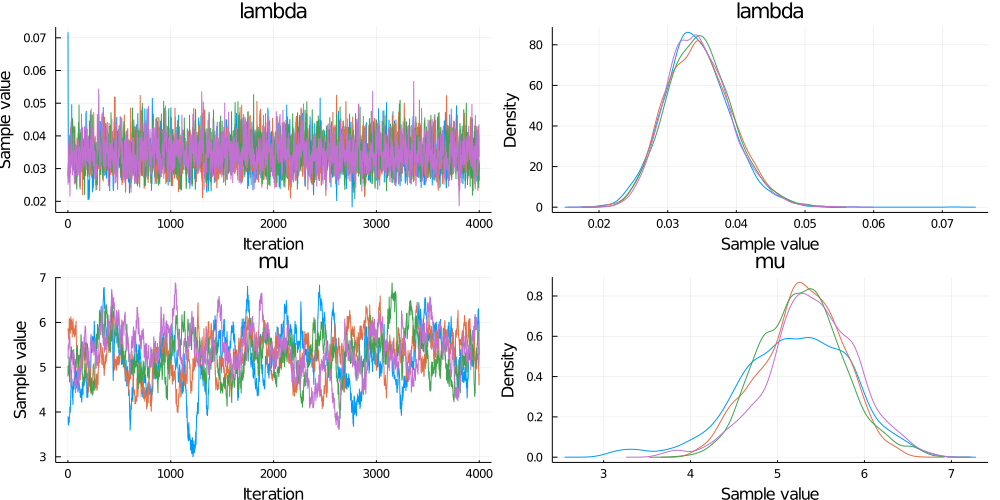

In [10]:
plot(chains)

得られたMCMCサンプルからランダムにパラメータを選びガウス分布から乱数生成することを繰り返すと、予測分布からのMCMCサンプルが得られる{% fn 2 %}。

In [11]:
# warm-upを排除してサンプルをえる
chain1 = chains[1001:4000,:,1]
mu_mcmc = chain1[:mu].value
lambda_mcmc = chain1[:lambda].value

predict_mcmc = zeros(3000)
for i in 1:3000
    mu_tmp = mu_mcmc[rand(1:3000)]
    lambda_tmp = lambda_mcmc[rand(1:3000)]
    x_tmp = rand(Normal(mu_tmp, sqrt(1/lambda_tmp)))
    predict_mcmc[i] = x_tmp
end

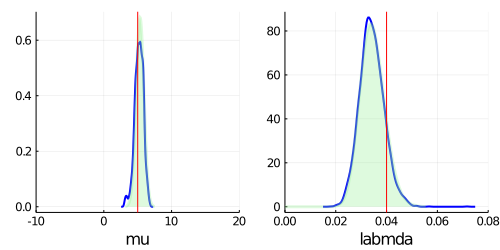

In [16]:
# 厳密解を計算
N = length(data)
# 事前分布のハイパーパラメータ
m = 0
beta = 1
a = 1
b = 1
# ハイパーパラメータを更新
beta_hat = N + beta
m_hat = (sum(data[1:N-1])+beta*m)/beta_hat
a_hat = N/2 + a
b_hat = (sum(data[1:N-1].^2) + beta*m^2 - beta_hat*m_hat^2)/2 + b
# 事後分布
updated_gamma = Gamma(a_hat, 1/b_hat)
updated_normal = Normal(m_hat, sqrt(1/(beta_hat*rand(updated_gamma))))
# 予測分布のパラメータ
mu_s = m_hat
lambda_s = beta_hat*a_hat/((1+beta_hat)*b_hat)
nu_s = 2*a_hat

# 予測分布
predict_dist = LocationScale(mu_s, sqrt(1/lambda_s), TDist(nu_s))

# 平均の事後分布のプロット
p1 = plot(chains[:,:,1][:mu], seriestype = :density, xlim = (mu_true-3*sigma_true,mu_true+3*sigma_true),
    w = 2, c = :blue)

# Visualize a green density plot of posterior distribution in closed-form.
plot!(p1, updated_normal, 
        xlabel = "mu", ylabel = "", title = "", xlim = (mu_true-3*sigma_true,mu_true+3*sigma_true), label = "Closed-form",
        fill=0, α=0.3, w=3, c = :lightgreen)

# Visualize the true probability of heads in red.
vline!(p1, [mu_true], label = "True mu", c = :red)

# 精度の事後分布のプロット
p2 = plot(chains[:,:,1][:lambda], seriestype = :density, xlim = (0, 2/sigma_true^2),
    w = 2, c = :blue)

# Visualize a green density plot of posterior distribution in closed-form.
plot!(p2, updated_gamma, 
        xlabel = "labmda", ylabel = "", title = "", xlim = (0, 2/sigma_true^2), label = "Closed-form",
        fill=0, α=0.3, w=3, c = :lightgreen)

# Visualize the true probability of heads in red.
vline!(p2, [(1/sigma_true)^2], label = "True lambda", c = :red)

plot(p1, p2, layout=(1,2))

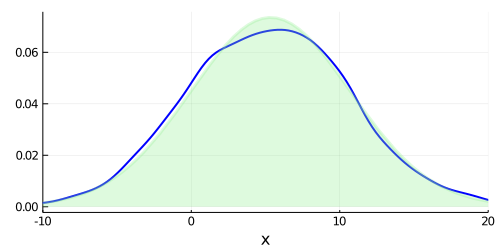

In [17]:
# 予測分布のプロット
p3 = plot(predict_mcmc, seriestype=:density, xlim = (mu_true-3*sigma_true,mu_true+3*sigma_true),
w = 2, c = :blue)
plot!(p3, predict_dist, 
        size = (500, 250),
        xlabel = "x", 
        ylabel = "", 
        legend = nothing,
        xlim = (mu_true-3*sigma_true,mu_true+3*sigma_true),
        fill=0, α=0.3, w=3, c = :lightgreen)

{{ '[須山敦志. ベイズ推論による機械学習入門. 講談社, 2017](https://www.kspub.co.jp/book/detail/1538320.html)' | fndetail: 1 }}
{{ '[松浦健太郎. StanとRでベイズ統計モデリング. 共立出版, 2016](https://www.kyoritsu-pub.co.jp/bookdetail/9784320112421)のChapter 2' | fndetail: 2 }}